In [34]:
#----------------------Outcomes and variables----------------------#

In [35]:
import numpy as np
import pandas as pd

In [36]:
#roll two dice for multiple times
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is', sum_of_dice) 

Sum of dice is 5


In [37]:
#Let's try rolling with three dice, instead of two

np.random.seed(1)  

sum_of_three_dice = die.sample(2, replace=True).sum().loc[0]
print('Sum of three dice is', sum_of_three_dice) 

Sum of three dice is 10


In [38]:
#The following code mimics the roll dice game for 50 times. And the results are all stored into "Result"

trial = 50
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [39]:
#Print the first 10 results
print(result[:10])

[6, 6, 7, 3, 11, 7, 8, 9, 9, 8]


In [40]:
#----------------------Frequency and distribution----------------------#

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#Roll the dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [43]:
#To summarize the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

3      2
4      6
5      5
6      6
7     10
8      9
9      5
10     3
11     3
12     1
Name: 0, dtype: int64


<AxesSubplot:>

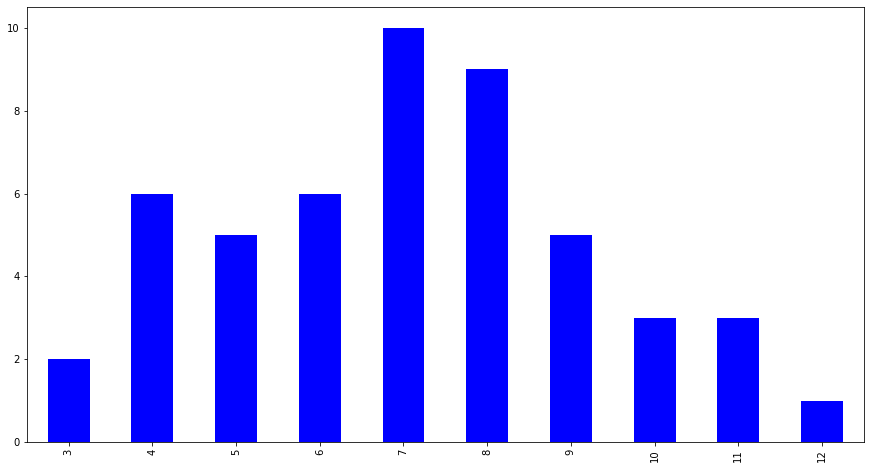

In [44]:
#Let's create a bar chart
sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

In [45]:
#----------------------Relative frequency----------------------#

<AxesSubplot:>

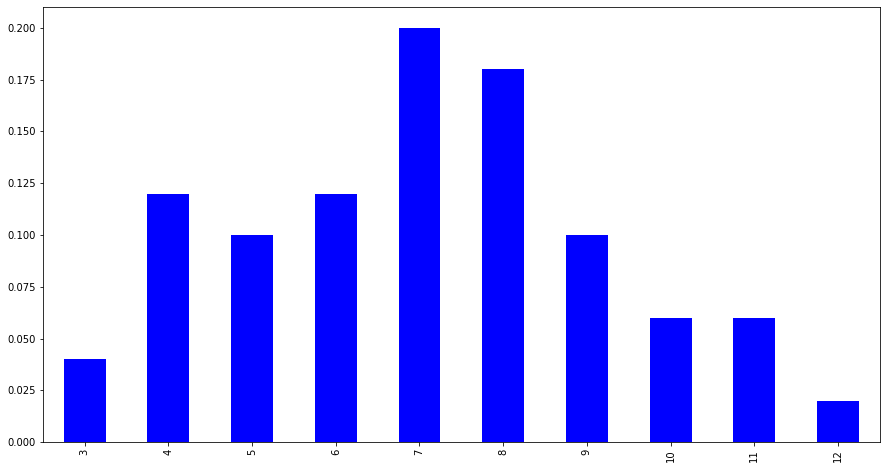

In [46]:
#Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

<AxesSubplot:>

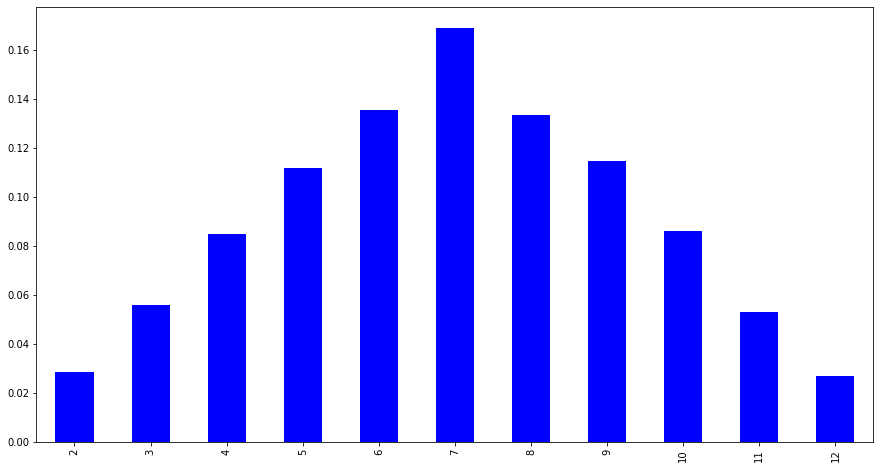

In [47]:
#Let us increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

In [48]:
#Conclusion: more trials more stability

In [49]:
#----------------------Expectation & variance----------------------#

In [50]:
#Assumption: all faces will be shown with equal probability
#We can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [51]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [52]:
#The mean and variance of the distribution. 
print(mean, var)

6.999999999999998 5.833333333333333


In [53]:
#----------------------Empirical mean and variance----------------------#

In [54]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [55]:
#The mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

7.0085 5.805618030901545


In [56]:
#----------------------Population & sample----------------------#

In [57]:
import pandas as pd
import numpy as np

In [58]:
#Create a df with 10 data 

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [59]:
#Draw sample with replacement, size=5 from Population

a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

4    19
9    60
7    16
4    19
5    13
Name: Population, dtype: int64


In [60]:
#Draw sample without replacement, size=5 from Population

a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

9    60
4    19
6    72
8    50
0    47
Name: Population, dtype: int64


In [61]:
#----------------------Parameters & stats----------------------#

In [62]:
# =Calculate sample mean and sample standard deviation, size =10

a_sample = data['Population'].sample(10, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  39.8
Sample variance is 911.2888888888889


In [63]:
#Avg if unbiased estimator
sample_length = 500
sample_variance_collection=[data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]

In [64]:
print(sample_variance_collection)

[655.7333333333333, 692.8444444444444, 640.1777777777777, 614.5, 423.0666666666667, 441.5111111111111, 633.7777777777778, 993.5999999999999, 675.6555555555556, 311.56666666666666, 601.7333333333333, 764.2222222222222, 288.62222222222215, 567.8333333333334, 813.2888888888889, 525.9555555555555, 470.8444444444444, 382.9888888888888, 792.2333333333332, 742.7111111111111, 315.12222222222226, 864.6666666666666, 688.0555555555555, 676.5, 761.4333333333334, 572.4444444444445, 530.4888888888888, 576.9333333333333, 865.3888888888889, 309.2111111111111, 577.2888888888889, 758.8444444444444, 923.7888888888889, 603.8222222222222, 703.0666666666666, 553.6, 689.2888888888889, 729.2111111111112, 579.3333333333334, 637.1222222222221, 546.2222222222222, 440.23333333333335, 1035.8333333333333, 792.1777777777778, 343.3777777777778, 959.8333333333334, 567.2111111111111, 996.9000000000001, 602.3222222222223, 288.9, 419.2888888888889, 613.1666666666666, 526.6666666666666, 15.600000000000001, 456.04444444444

Giving up send_request(...) after 11 tries (requests.exceptions.SSLError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)'))))
error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))


In [65]:
#----------------------Variation of sample----------------------#

In [66]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [67]:
#Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  10.60222082247326
sample SD is  5.787848928813409


In [68]:
#----------------------Empirical dist of mean----------------------#

In [69]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [70]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

AttributeError: 'Rectangle' object has no property 'normed'

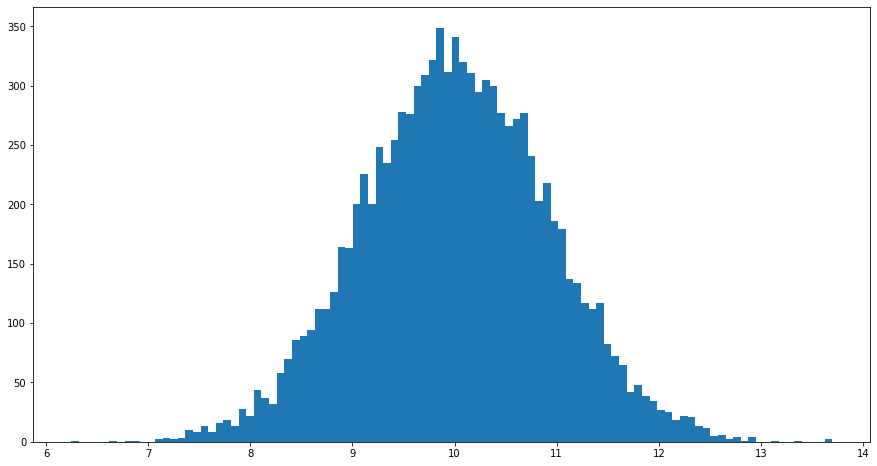

In [71]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

In [72]:
#----------------------Sampling from arbitrary dist----------------------#

AttributeError: 'Rectangle' object has no property 'normed'

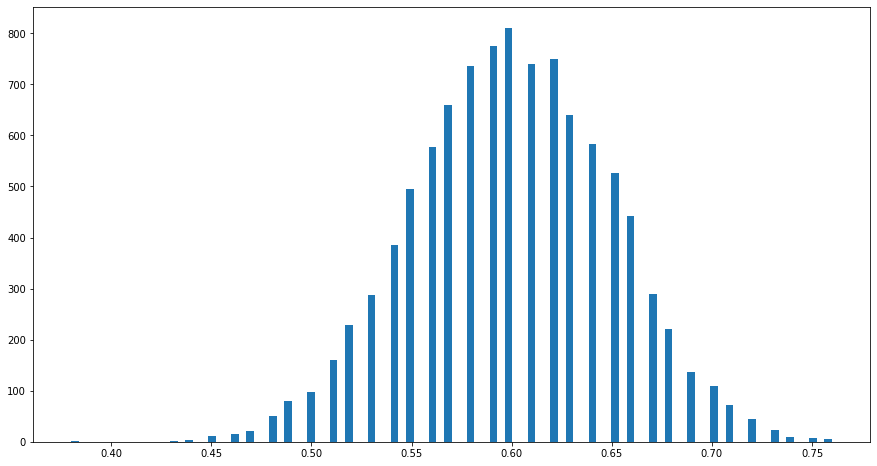

In [73]:
#What does the central limit theorem yell us...
#the sample size is larger enough, 
#the distribution of sample mean is approximately normal
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))